In [15]:
# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [16]:
#Load the data set
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [19]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
#Train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train) #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions
#print(y_test)

['versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'versicolor']


In [22]:
print( accuracy_score(y_test, predictions))

0.9666666666666667


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]


Actual count: setosa - 8 versicolor - 12 virginica - 10

Predicted count: setosa - 8 versicolor - 12 virginica - 10



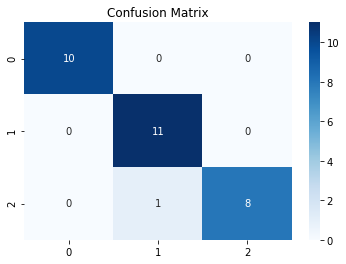

In [24]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# K-Fold

In [25]:
#Load the data set
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [27]:
# Declaring a model
model = LogisticRegression(max_iter=1000)

In [28]:
k = 10
acc_score = []
cv = KFold(n_splits=k, random_state=42, shuffle=True)
for train_index , test_index in cv.split(X):
  print("Train Index: ", train_index)
  print("Test Index: ", test_index, "\n")
  X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
  y_train , y_test = y[train_index] , y[test_index]

  model.fit(X_train,y_train)
  pred_values = model.predict(X_test)
     
  acc = accuracy_score(pred_values , y_test)
  acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Train Index:  [  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  20  21
  22  23  24  25  26  27  28  29  30  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  65  66  67  69  70  71  72  74  75  77  79  80  81  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 142 143 144 145 146 147 148 149]
Test Index:  [  9  12  18  19  31  36  64  68  73  76  78  82 110 118 141] 

Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  57  58  59
  60  61  62  63  64  65  66  67  68  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  